In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('../../../..'))
if module_path not in sys.path:
    sys.path.insert(1, module_path)

In [2]:
from cohesivm.database import Database
from cohesivm.experiment import Experiment
from cohesivm.gui import XYDataStreamPlot, ExperimentGUI
from fpp_components import CurrentSourceChannel, VoltmeterChannel, FPPDevice, FPP2X2, FPPMeasurement

db = Database('workflow.h5')

current_source = CurrentSourceChannel(max_voltage=5.)
voltmeter = VoltmeterChannel()
device = FPPDevice('4')
interface = FPP2X2('5')
measurement = FPPMeasurement(
    currents=[1e-6, 1e-5, 1e-4, 5e-4, 1e-3, 3.3e-3, 6.7e-3, 1e-2],
    temperature=300,
    film_thickness=2e-4
)

experiment = Experiment(
    database=db,
    device=device,
    interface=interface,
    measurement=measurement,
    sample_id='fpp_test',
    selected_contacts=None
)

plot = XYDataStreamPlot('Current (A)', 'Voltage (V)')

ExperimentGUI(experiment, plot).display()

In [3]:
from cohesivm.database import Database
from cohesivm.gui import DatabaseGUI

db = Database('workflow.h5')

DatabaseGUI(db).display()

In [4]:
from cohesivm.database import Database
from cohesivm.gui import AnalysisGUI
from fpp_analysis import FPPAnalysis

db = Database('workflow.h5')

dataset = db.load_dataset(
    '/FPPMeasurement/4995ea0b10600040:68acd711bd9efe3b:6e20c0b30261a5b5/2024-08-07T12:20:00.275073-fpp_test'
)

analysis = FPPAnalysis(dataset)

AnalysisGUI(analysis).display()

In [5]:
cs = CurrentSourceChannel(False, 5.)
vm = VoltmeterChannel()
device = FPPDevice('4', [cs, vm])
with device.connect():
    device.channels[0].source_current(0.02)
    print(device.channels[1].measure_voltage())

2.0


In [6]:
with device.connect():
    device.channels[0].source_current(0.051)
    print(device.channels[1].measure_voltage())

0.0


In [7]:
import fpp_connect
interface = FPP2X2('5')
fpp_connect.get_resistance()

100.0

In [8]:
interface.select_contact('BR')
fpp_connect.get_resistance()

200.0

In [9]:
cs = CurrentSourceChannel(False, 5.)
vm = VoltmeterChannel()
device = FPPDevice('123', [cs, vm])
currents = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
measurement = FPPMeasurement(currents, 300)
measurement.run(device)

array([(1.e-06, 2.e-04), (1.e-05, 2.e-03), (1.e-04, 2.e-02),
       (1.e-03, 2.e-01), (1.e-02, 2.e+00), (1.e-01, 0.e+00)],
      dtype=[('Current (A)', '<f8'), ('Voltage (V)', '<f8')])

In [10]:
import numpy as np
from fpp_analysis import FPPAnalysis
from cohesivm.database import Dimensions

In [11]:
dtype = [('Current (A)', float), ('Voltage (V)', float)]
d1 = np.array([(a, 100 * a) for a in range(1, 10)], dtype=dtype)
d2 = d1.copy()
d3 = np.array([(a, 50 * a + np.random.rand() * 10 - 5) for a in range(1, 10)], dtype=dtype)
dataset = {'P1': d1, 'P2': d2, 'P3': d3}

In [12]:
if_dim = Dimensions.Rectangle(20., 20.)
con_pos = {'P1': (5., 1.), 'P2': (10., 10.), 'P3': (15., 15.)}
pix_dim = {k: Dimensions.Generic([-1.5, -0.5, 0.5, 1.5], [0., 0., 0., 0.]) for k in dataset.keys()}
temp = 300.
t = 1.
analysis = FPPAnalysis(dataset, if_dim, con_pos, pix_dim, temp, t)

In [13]:
analysis.linear('P1'), analysis.linear('P2'), analysis.linear('P3')

(99.99999999999999, 99.99999999999999, 50.725995774879415)

In [14]:
analysis.sheet('P1'), analysis.sheet('P2'), analysis.sheet('P3')

(453.2360141827193, 453.2360141827193, 229.9084814045581)

In [15]:
analysis.edge_sheet('P1'), analysis.edge_sheet('P2'), analysis.edge_sheet('P3')

(338.47934651602014, 450.8122096478881, 224.91600736623624)

In [16]:
analysis.probe_coordinates('P1'), analysis.mirrored_coordinates('P1')

([(3.5, 1.0), (4.5, 1.0), (5.5, 1.0), (6.5, 1.0)], [(3.5, -1.0), (6.5, -1.0)])

In [22]:
result_map = analysis.generate_result_maps('Edge Sheet Resistance (Ohm)')[0]
result_map

array([[338.47934652,          nan,          nan],
       [         nan, 450.81220965,          nan],
       [         nan,          nan, 224.25210453]])

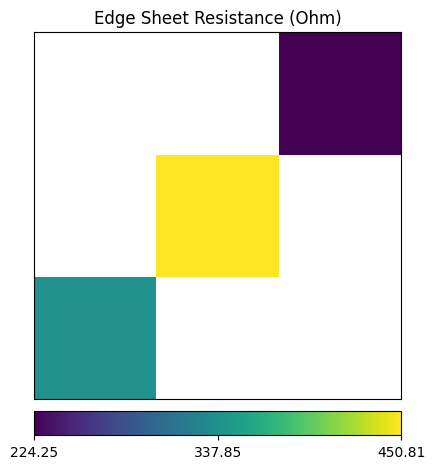

In [24]:
from cohesivm.analysis import plot_result_map
plot_result_map(result_map, 'Edge Sheet Resistance (Ohm)')

In [18]:
import matplotlib.pyplot as plt

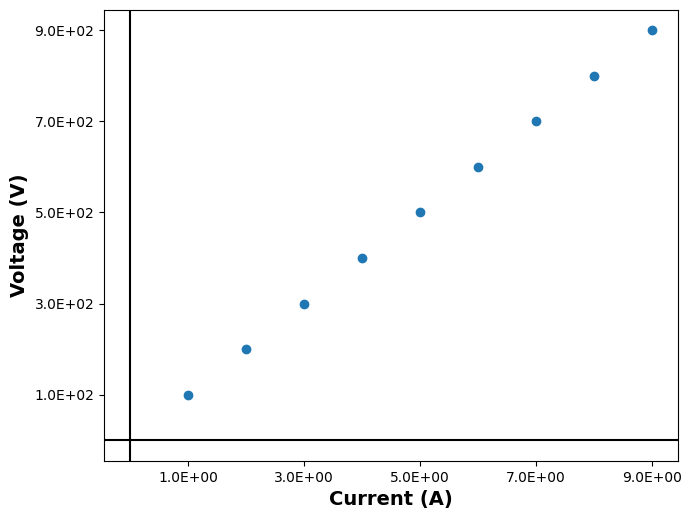

In [19]:
analysis.measurement('P1')
plt.show()

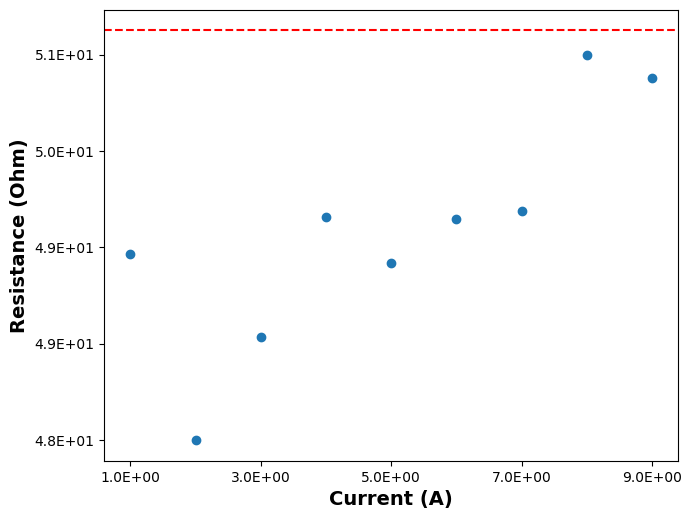

In [20]:
analysis.resistance_plot('P3')
plt.show()

In [21]:
import numpy as np
from fpp_analysis import FPPAnalysis
from cohesivm.database import Dimensions

dtype = [('Current (A)', float), ('Voltage (V)', float)]
d1 = np.array([(a, 100 * a) for a in range(1, 10)], dtype=dtype)
d2 = d1.copy()
d3 = np.array([(a, 50 * a + np.random.rand() * 10 - 5) for a in range(1, 10)], dtype=dtype)
dataset = {'P1': d1, 'P2': d2, 'P3': d3}

if_dim = Dimensions.Rectangle(20., 20.)
con_pos = {'P1': (5., 1.), 'P2': (10., 10.), 'P3': (15., 15.)}
pix_dim = {k: Dimensions.Generic([-1.5, -0.5, 0.5, 1.5], [0., 0., 0., 0.]) for k in dataset.keys()}
temp = 300.
t = 1.
analysis = FPPAnalysis(dataset, if_dim, con_pos, pix_dim, temp, t)